In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
외국인역대성적 = pd.read_csv('kbo_yearly_foreigners_2011_2018.csv')
외국인메이저성적 = pd.read_csv('fangraphs_foreigners_2011_2018.csv')
외국인스탯캐스터 = pd.read_csv('baseball_savant_foreigners_2011_2018.csv')
신규외국인성적 = pd.read_csv('fangraphs_foreigners_2019.csv')
신규외국인스텟캐스터 = pd.read_csv('baseball_savant_foreigners_2019.csv')

In [9]:
display(외국인역대성적.head())
print('*'*50)
display(외국인메이저성적.head())
print('*'*50)
display(외국인스탯캐스터.head())
print('*'*50)
display(신규외국인성적.head())
print('*'*50)
display(신규외국인스텟캐스터.head())
print('*'*50)

pitcher_name  year team   ERA  TBF    H  HR  BB  HBP   SO year_born
0          니퍼트  2011   두산  2.55  763  150   8  64   10  150       NaN
1          니퍼트  2012   두산  3.20  785  156  15  68    8  126       NaN
2          니퍼트  2013   두산  3.58  482  108   7  34    4  104       NaN
3          니퍼트  2014   두산  3.81  760  186  17  48    6  158       NaN
4          니퍼트  2015   두산  5.10  404  104   4  33    4   76       NaN

**************************************************


pitcher_name    year   ERA  WAR    TBF      H    HR    BB  HBP     SO  WHIP  \
0          오간도  2011.0  3.51  3.3  693.0  149.0  16.0  43.0  7.0  126.0  1.14   
1           험버  2011.0  3.75  3.2  676.0  151.0  14.0  41.0  6.0  116.0  1.18   
2          루카스  2012.0  3.76  2.8  827.0  185.0  13.0  78.0  1.0  140.0  1.36   
3        다이아몬드  2012.0  3.54  2.2  714.0  184.0  17.0  31.0  4.0   90.0  1.24   
4         듀브론트  2013.0  4.32  2.2  705.0  161.0  13.0  71.0  5.0  139.0  1.43   

   BABIP   FIP    LD%    GB%    FB%  IFFB%  SwStr%  Swing%  
0  0.265  3.65  0.237  0.364  0.674  0.147   0.090   0.475  
1  0.275  3.58  0.168  0.471  0.458  0.094   0.092   0.463  
2  0.289  3.75  0.203  0.572  0.707  0.082   0.062   0.424  
3  0.292  3.94  0.210  0.534  0.597  0.040   0.068   0.467  
4  0.310  3.78  0.199  0.456  0.633  0.127   0.077   0.434

**************************************************


game_date  release_speed    batter  pitcher     events  \
0  2010-10-09           93.0  425834.0   430962  field_out   
1  2010-10-09           95.2  150289.0   430962   home_run   
2  2010-10-09           94.3  150289.0   430962        NaN   
3  2010-10-09           94.0  150289.0   430962        NaN   
4  2010-10-09           92.8  150289.0   430962        NaN   

           description  zone stand p_throws   bb_type      ...       plate_x  \
0        hit_into_play   4.0     R        R     popup      ...        -0.626   
1  hit_into_play_score   5.0     L        R  fly_ball      ...        -0.112   
2                 foul   2.0     L        R       NaN      ...         0.272   
3         blocked_ball  13.0     L        R       NaN      ...        -1.193   
4                 ball  14.0     L        R       NaN      ...         0.370   

   plate_z      ax      ay      az  launch_speed  launch_angle  \
0    2.771  -6.404  26.077  -9.694           NaN           NaN   
1    2.401 -10.168  28.786  -8.895           NaN           NaN   
2    3.052  -5.605  26.657  -7.794           NaN           NaN   
3    0.632  -9.099  30.273  -6.371           NaN           NaN   
4    1.383  -5.846  27.290 -11.262           NaN           NaN   

   release_spin_rate       pitch_name  pitcher_name  
0                NaN  4-Seam Fastball           니퍼트  
1                NaN  4-Seam Fastball           니퍼트  
2                NaN  4-Seam Fastball           니퍼트  
3                NaN  4-Seam Fastball           니퍼트  
4                NaN  4-Seam Fastball           니퍼트  

[5 rows x 24 columns]

**************************************************


pitcher_name    year   ERA  WAR    TBF      H    HR    BB  HBP    SO  WHIP  \
0          버틀러  2017.0  3.95  0.6  237.0   50.0   4.0  28.0  2.0  30.0  1.43   
1           터너  2014.0  6.13  0.5  501.0  148.0  12.0  33.0  1.0  71.0  1.60   
2           터너  2013.0  3.74  0.3  514.0  116.0  11.0  54.0  4.0  77.0  1.44   
3         맥과이어  2017.0  2.63  0.3   56.0   10.0   1.0   2.0  1.0  11.0  0.88   
4           터너  2012.0  4.42  0.2  231.0   50.0   9.0  16.0  0.0  36.0  1.20   

   BABIP   FIP    LD%    GB%    FB%  IFFB%  SwStr%  Swing%  
0  0.266  4.66  0.224  0.443  0.661  0.138   0.072   0.465  
1  0.354  4.16  0.208  0.491  0.636  0.052   0.080   0.461  
2  0.285  4.43  0.195  0.457  0.675  0.047   0.083   0.454  
3  0.220  3.16  0.119  0.286  0.638  0.080   0.095   0.448  
4  0.241  4.79  0.192  0.452  0.566  0.079   0.096   0.454

**************************************************


game_date  release_speed  batter  pitcher   events          description  \
0  2018-05-03           85.4  519058   518445  sac_fly  hit_into_play_score   
1  2018-05-03           91.7  519058   518445      NaN                 foul   
2  2018-05-03           86.1  519058   518445      NaN                 foul   
3  2018-05-03           85.3  519058   518445      NaN                 ball   
4  2018-05-03           83.3  519058   518445      NaN      swinging_strike   

   zone stand p_throws   bb_type      ...       plate_x  plate_z      ax  \
0  13.0     L        L  fly_ball      ...       -0.9200   2.0320 -6.1015   
1  12.0     L        L       NaN      ...        0.4845   3.5506  6.7067   
2  13.0     L        L       NaN      ...       -1.4736   1.6516 -5.7169   
3  11.0     L        L       NaN      ...       -1.5007   2.5166 -2.7315   
4  12.0     L        L       NaN      ...        0.3519   3.5876 -3.3883   

        ay       az  launch_speed  launch_angle  release_spin_rate  \
0  22.5146 -29.0091          90.4          26.0             2305.0   
1  29.5849 -15.5999          72.7          14.0             2265.0   
2  25.0563 -27.4184           NaN           NaN             2379.0   
3  24.9668 -30.5457           NaN           NaN             2284.0   
4  24.6765 -32.2025           NaN           NaN             2332.0   

        pitch_name  pitcher_name  
0           Cutter           채드벨  
1  4-Seam Fastball           채드벨  
2           Cutter           채드벨  
3           Cutter           채드벨  
4           Slider           채드벨  

[5 rows x 24 columns]

**************************************************


# 외국인 투수 승패 크롤링

In [3]:
name_list = list(set(외국인역대성적['pitcher_name']))

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

In [109]:
from selenium import webdriver
import time
path = './driver/chromedriver.exe'
driver = webdriver.Chrome(path)

In [161]:
def page_search(start,end,dic):
    for page_num in range(start,end):
        print(page_num)
        page3 = driver.find_elements_by_css_selector('.paging')
        page3[0].find_elements_by_tag_name('a')[page_num].click()
        time.sleep(1.5)
        page2 = driver.find_elements_by_css_selector('.tData01')
        a = page2[0].find_element_by_tag_name('tbody').find_elements_by_tag_name('tr')
        for idx,value in enumerate(a):
            name = value.find_elements_by_tag_name('td')[1].text
            for key in list(dic.keys()):
                if key == name:
                    print(name)
                    dic[key] = [str(value.find_elements_by_tag_name('td')[5].text), 
                                str(value.find_elements_by_tag_name('td')[6].text)]               

In [162]:
def player_win(year,dic):
    driver.get('https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx')
    page1 = driver.find_elements_by_tag_name('option')
    for i in page1:
            if i.text == str(year):
                print(year)
                i.click()
                time.sleep(1.5)
                page = driver.find_elements_by_css_selector('.tData01')
                k = page[0].find_element_by_tag_name('thead').find_element_by_tag_name('tr').find_elements_by_tag_name('th')
                k[5].click()
                time.sleep(1.5)
                page3 = driver.find_elements_by_css_selector('.paging')
                page_search(1,6,dic)
                page3 = driver.find_elements_by_css_selector('.paging')
                page3[0].find_elements_by_tag_name('a')[-1].click()
                time.sleep(1.5)
                page3 = driver.find_elements_by_css_selector('.paging')
                page_num = len(page3[0].find_elements_by_tag_name('a')[2:-1])
                print(page_num)
                page_search(2,page_num+2,dic)
                break
    return    dic                              

In [163]:
names=[]
def setName(cnt):
    global names
    for i in range (11,cnt+1):
        names.append('name_dict_{}'.format(i)) 
    for name1 in names:
        globals()[name1] = {}
        for i2 in name_list:
            globals()[name1][i2] = 0
setName(18)        

In [164]:
year_list = [i for i in range(2011,2019)]

In [165]:
def save(dic_list, year_list):
    for dic,year in zip(dic_list, year_list):
        print(dic)
        dic = player_win(year,eval(dic))

In [166]:
save(names, year_list)

name_dict_11
2011
1
니퍼트
리즈
2
3
4
5
2
2
3
name_dict_12
2012
1
탈보트
니퍼트
소사
2
리즈
3
4
5
2
2
3
name_dict_13
2013
1
세든
니퍼트
리즈
소사
레이예스
밴덴헐크
2
이브랜드
3
아담
4
올슨
5
2
2
3
name_dict_14
2014
1
니퍼트
밴덴헐크
소사
웨버
2
앨버스
볼스테드
티포드
어센시오
3
마야
레이예스
울프
4
토마스
5
2
2
3
name_dict_15
2015
1
해커
피가로
피어밴드
린드블럼
클로이드
레일리
스틴슨
루카스
소사
탈보트
2
세든
니퍼트
로저스
스와잭
3
에반
험버
4
마야
5
어윈
4
2
3
4
5
name_dict_16
2016
1
니퍼트
보우덴
헥터
해커
지크
린드블럼
소사
레일리
카스티요
2
허프
피어밴드
코엘로
마리몬
세든
3
웹스터
4
플란데
로저스
서캠프
코프랜드
5
피노
4
2
레온
3
4
5
name_dict_17
2017
1
헥터
니퍼트
레일리
맨쉽
해커
소사
브리검
다이아몬드
오간도
팻딘
2
피어밴드
허프
비야누에바
3
린드블럼
보우덴
4
레나도
5
3
2
오설리반
3
4
name_dict_18
2018
1
후랭코프
린드블럼
샘슨
헥터
레일리
브리검
소사
윌슨
산체스
아델만
니퍼트
2
피어밴드
보니야
팻딘
듀브론트
베렛
로저스
해커
3
헤일
4
휠러
5
4
2
3
4
5


In [172]:
name_dict_13['해커'] = ['4','11']
name_dict_14['해커'] = ['8','8']

In [173]:
import numpy as np
# 딕셔너리랑 df랑 합치기
for dic,year in zip(names, year_list):
    for i in range(외국인역대성적.shape[0]):
        if 외국인역대성적.loc[i,'year'] == year:
            print(year)
            for key,value in eval(dic).items():
                if 외국인역대성적.loc[i,'pitcher_name'] == key:
                    if value != 0:
                        print(key, value)
                        외국인역대성적.loc[i,'2011년_승_패'] = str(' '.join(value))
                    else:
                        외국인역대성적.loc[i,'2011년_승_패'] = 0

2011
니퍼트 ['15', '6']
2011
리즈 ['11', '13']
2012
니퍼트 ['11', '10']
2012
리즈 ['5', '12']
2012
소사 ['9', '8']
2012
탈보트 ['14', '3']
2013
니퍼트 ['12', '4']
2013
레이예스 ['8', '13']
2013
리즈 ['10', '13']
2013
밴덴헐크 ['7', '9']
2013
세든 ['14', '6']
2013
소사 ['9', '9']
2013
아담 ['4', '8']
2013
올슨 ['1', '1']
2013
이브랜드 ['6', '14']
2013
해커 ['4', '11']
2014
니퍼트 ['14', '7']
2014
레이예스 ['2', '7']
2014
마야 ['2', '4']
2014
밴덴헐크 ['13', '4']
2014
볼스테드 ['5', '7']
2014
소사 ['10', '2']
2014
앨버스 ['6', '13']
2014
어센시오 ['4', '1']
2014
울프 ['2', '2']
2014
웨버 ['9', '6']
2014
토마스 ['2', '2']
2014
티포드 ['5', '6']
2014
해커 ['8', '8']
2015
니퍼트 ['6', '5']
2015
레일리 ['11', '9']
2015
로저스 ['6', '2']
2015
루카스 ['10', '11']
2015
린드블럼 ['13', '11']
2015
마야 ['2', '5']
2015
세든 ['7', '5']
2015
소사 ['10', '12']
2015
스와잭 ['5', '7']
2015
스틴슨 ['11', '10']
2015
어윈 ['1', '7']
2015
에반 ['4', '0']
2015
클로이드 ['11', '11']
2015
탈보트 ['10', '11']
2015
피가로 ['13', '7']
2015
피어밴드 ['13', '11']
2015
해커 ['19', '5']
2015
험버 ['3', '3']
2016
니퍼트 ['22', '3']
2016
레온 ['0', '

In [174]:
외국인역대성적.to_csv('kbo_yearly_foreigners_2011_2018_추가분.csv',mode='w',index=False,encoding='utf-8-sig')

In [175]:
외국인역대성적[외국인역대성적['2011년_승_패'] == 0]

Empty DataFrame
Columns: [pitcher_name, year, team, ERA, TBF, H, HR, BB, HBP, SO, year_born, 2011년_승_패]
Index: []

In [3]:
외국인역대성적['승'] = 외국인역대성적['2011년_승_패'].apply(lambda x:str(x).split(' ')[0])
외국인역대성적['패'] = 외국인역대성적['2011년_승_패'].apply(lambda x:str(x).split(' ')[1])

외국인역대성적.drop('2011년_승_패',axis=1,inplace=True)

def winratio(x):
    return round(int(x['승']) / (int(x['승'])+int(x['패'])),3)

외국인역대성적['승률'] = 외국인역대성적.apply(lambda x:winratio(x),axis=1)

외국인역대성적['경기수'] =  외국인역대성적.apply(lambda x:int(x['승']) + int(x['패']),axis=1)

In [5]:
외국인역대성적.to_csv('plus_win_lose.csv',mode='w',index=False,encoding='utf-8-sig')

In [8]:
def headtail10(df,text):
    display(df.sort_values(text,ascending=False).head(10))
    print('*'*20,'head','*'*20)
    display(df.sort_values(text,ascending=False).tail(10))

In [81]:
headtail10(외국인역대성적,['경기수','승률'])

pitcher_name  year team   ERA  TBF    H  HR  BB  HBP   SO      year_born  \
5           니퍼트  2016   두산  2.95  701  151  15  57    9  142            NaN   
98           헥터  2017  KIA  3.48  854  221  21  45    5  149            NaN   
37          보우덴  2016   두산  3.80  742  159  17  54    6  160            NaN   
90           해커  2015   NC  3.13  833  174  14  36   25  164            NaN   
25         린드블럼  2015   롯데  3.56  861  196  28  52   12  180  1987년 06월 15일   
84         피어밴드  2015   넥센  4.67  774  202  23  61   12  137            NaN   
17          레일리  2018   롯데  4.74  775  180  24  54   18  178  1988년 06월 29일   
22           리즈  2011   LG  3.88  719  149  11  84   15  122            NaN   
24           리즈  2013   LG  3.06  837  153  11  88   20  188            NaN   
26         린드블럼  2016   롯데  5.28  791  197  28  77    9  148  1987년 06월 15일   

     승   패     승률  경기수  
5   22   3  0.880   25  
98  20   5  0.800   25  
37  18   7  0.720   25  
90  19   5  0.792   24  
25  13  11  0.542   24  
84  13  11  0.542   24  
17  11  13  0.458   24  
22  11  13  0.458   24  
24  10  13  0.435   23  
26  10  13  0.435   23

******************** head ********************


pitcher_name  year team    ERA  TBF   H  HR  BB  HBP  SO year_born  승  패  \
10          레나도  2017   삼성   6.80  243  70  11  27    6  28       NaN  2  3   
19          로저스  2016   한화   4.30  160  42   3  12    2  24       NaN  2  3   
73         코프랜드  2016   LG   5.54  314  71   8  42    7  34       NaN  2  3   
83           피노  2016   KT   7.15  191  62   4  15    4  23       NaN  2  3   
62           에반  2015  KIA   4.44  115  30   0  13    1  25       NaN  4  0   
66           울프  2014   SK   4.85  364  88  10  27    6  41       NaN  2  2   
77          토마스  2014  KIA   4.44  210  55   3  19    1  51       NaN  2  2   
65           올슨  2013   두산   6.52  180  41   2  27    5  35       NaN  1  1   
64         오설리반  2017   넥센  15.75   43  17   2   2    1   6       NaN  0  2   
11           레온  2016   삼성  11.25   40  16   2   1    1   7       NaN  0  1   

     승률  경기수  
10  0.4    5  
19  0.4    5  
73  0.4    5  
83  0.4    5  
62  1.0    4  
66  0.5    4  
77  0.5    4  
65  0.5    2  
64  0.0    2  
11  0.0    1

In [82]:
headtail10(외국인역대성적,['승률','경기수'])

pitcher_name  year team   ERA  TBF    H  HR  BB  HBP   SO      year_born  \
62            에반  2015  KIA  4.44  115   30   0  13    1   25            NaN   
5            니퍼트  2016   두산  2.95  701  151  15  57    9  142            NaN   
100         후랭코프  2018   두산  3.74  621  118  12  55   22  134  1988년 08월 27일   
50            소사  2014   넥센  4.61  537  140  18  45    3   98            NaN   
75           탈보트  2012   삼성  3.97  584  136   8  54    5   68            NaN   
91            해커  2016   NC  3.45  587  132  14  31   10  119            NaN   
98            헥터  2017  KIA  3.48  854  221  21  45    5  149            NaN   
60          어센시오  2014  KIA  4.05  207   49   5  14    2   56            NaN   
90            해커  2015   NC  3.13  833  174  14  36   25  164            NaN   
28          린드블럼  2018   두산  2.88  681  142  16  38    8  157  1987년 06월 15일   

      승  패     승률  경기수  
62    4  0  1.000    4  
5    22  3  0.880   25  
100  18  3  0.857   21  
50   10  2  0.833   12  
75   14  3  0.824   17  
91   13  3  0.812   16  
98   20  5  0.800   25  
60    4  1  0.800    5  
90   19  5  0.792   24  
28   15  4  0.789   19

******************** head ********************


pitcher_name  year team    ERA  TBF    H  HR  BB  HBP   SO year_born  승  \
23            리즈  2012   LG   3.69  656  138   6  68    9  144       NaN  5   
31            마야  2015   두산   8.17  317   83   6  31    5   62       NaN  2   
44           서캠프  2016   한화   6.31  194   54   5  17    5   36       NaN  2   
88            해커  2013   NC   3.63  744  163  12  50   17  127       NaN  4   
101           휠러  2018   한화   5.13  459  128  12  34   10   94       NaN  3   
81           플란데  2016   삼성   7.60  330   92  13  33    1   56       NaN  2   
13          레이예스  2014   SK   6.55  369  103  10  38    3   41       NaN  2   
61            어윈  2015   KT   8.68  271   90  10  21    2   41       NaN  1   
64          오설리반  2017   넥센  15.75   43   17   2   2    1    6       NaN  0   
11            레온  2016   삼성  11.25   40   16   2   1    1    7       NaN  0   

      패     승률  경기수  
23   12  0.294   17  
31    5  0.286    7  
44    5  0.286    7  
88   11  0.267   15  
101   9  0.250   12  
81    6  0.250    8  
13    7  0.222    9  
61    7  0.125    8  
64    2  0.000    2  
11    1  0.000    1

In [9]:
headtail10(외국인역대성적,['경기수'])

pitcher_name  year team   ERA  TBF    H  HR  BB  HBP   SO      year_born  \
37          보우덴  2016   두산  3.80  742  159  17  54    6  160            NaN   
98           헥터  2017  KIA  3.48  854  221  21  45    5  149            NaN   
5           니퍼트  2016   두산  2.95  701  151  15  57    9  142            NaN   
22           리즈  2011   LG  3.88  719  149  11  84   15  122            NaN   
84         피어밴드  2015   넥센  4.67  774  202  23  61   12  137            NaN   
25         린드블럼  2015   롯데  3.56  861  196  28  52   12  180  1987년 06월 15일   
90           해커  2015   NC  3.13  833  174  14  36   25  164            NaN   
17          레일리  2018   롯데  4.74  775  180  24  54   18  178  1988년 06월 29일   
24           리즈  2013   LG  3.06  837  153  11  88   20  188            NaN   
70           지크  2016  KIA  5.27  705  188  16  68    5  125            NaN   

     승   패     승률  경기수  
37  18   7  0.720   25  
98  20   5  0.800   25  
5   22   3  0.880   25  
22  11  13  0.458   24  
84  13  11  0.542   24  
25  13  11  0.542   24  
90  19   5  0.792   24  
17  11  13  0.458   24  
24  10  13  0.435   23  
70  10  13  0.435   23

******************** head ********************


pitcher_name  year team    ERA  TBF   H  HR  BB  HBP  SO year_born  승  패  \
83           피노  2016   KT   7.15  191  62   4  15    4  23       NaN  2  3   
60         어센시오  2014  KIA   4.05  207  49   5  14    2  56       NaN  4  1   
10          레나도  2017   삼성   6.80  243  70  11  27    6  28       NaN  2  3   
73         코프랜드  2016   LG   5.54  314  71   8  42    7  34       NaN  2  3   
62           에반  2015  KIA   4.44  115  30   0  13    1  25       NaN  4  0   
66           울프  2014   SK   4.85  364  88  10  27    6  41       NaN  2  2   
77          토마스  2014  KIA   4.44  210  55   3  19    1  51       NaN  2  2   
64         오설리반  2017   넥센  15.75   43  17   2   2    1   6       NaN  0  2   
65           올슨  2013   두산   6.52  180  41   2  27    5  35       NaN  1  1   
11           레온  2016   삼성  11.25   40  16   2   1    1   7       NaN  0  1   

     승률  경기수  
83  0.4    5  
60  0.8    5  
10  0.4    5  
73  0.4    5  
62  1.0    4  
66  0.5    4  
77  0.5    4  
64  0.0    2  
65  0.5    2  
11  0.0    1

In [ ]:
# 여기서 퇴출된 선수 명단을 삭제하자.

In [3]:
throw_df = pd.read_csv('plus_win_lose_2.csv')
throw_df.head()

pitcher_name  year team   ERA  TBF    H  HR  BB  HBP   SO year_born   승   패  \
0           리즈  2011   LG  3.88  719  149  11  84   15  122       NaN  11  13   
1          니퍼트  2011   두산  2.55  763  150   8  64   10  150       NaN  15   6   
2          니퍼트  2012   두산  3.20  785  156  15  68    8  126       NaN  11  10   
3           리즈  2012   LG  3.69  656  138   6  68    9  144       NaN   5  12   
4           소사  2012  KIA  3.54  614  137   9  39    8  104       NaN   9   8   

      승률  경기수  방출연도  
0  0.458   24   NaN  
1  0.714   21   NaN  
2  0.524   21   NaN  
3  0.294   17   NaN  
4  0.529   17   NaN

In [4]:
throw_df_01 =  throw_df[throw_df['방출연도'].isnull() == False].reset_index(drop=True)
throw_df_01['방출연도'] = throw_df_01['방출연도'].astype(int)

In [6]:
throw_df_01.describe()

year        ERA         TBF           H         HR         BB  \
count    17.000000  17.000000   17.000000   17.000000  17.000000  17.000000   
mean   2015.764706   6.465294  335.294118   87.294118   8.411765  32.529412   
std       1.437420   2.745130  168.648957   45.153578   5.038090  15.914293   
min    2013.000000   3.770000   43.000000   17.000000   2.000000   2.000000   
25%    2015.000000   5.130000  271.000000   62.000000   6.000000  21.000000   
50%    2016.000000   5.700000  314.000000   76.000000   8.000000  32.000000   
75%    2016.000000   6.750000  369.000000  103.000000  10.000000  42.000000   
max    2018.000000  15.750000  774.000000  202.000000  23.000000  62.000000   

             HBP          SO          승          패         승률        경기수  \
count  17.000000   17.000000  17.000000  17.000000  17.000000  17.000000   
mean    5.058824   53.352941   3.882353   5.235294   0.396647   9.117647   
std     3.071453   32.779455   3.038963   2.727852   0.167412   5.182692   
min     1.000000    6.000000   0.000000   1.000000   0.000000   2.000000   
25%     3.000000   35.000000   2.000000   3.000000   0.286000   6.000000   
50%     5.000000   43.000000   3.000000   5.000000   0.417000   9.000000   
75%     7.000000   62.000000   5.000000   7.000000   0.500000  11.000000   
max    12.000000  137.000000  13.000000  11.000000   0.600000  24.000000   

              방출연도  
count    17.000000  
mean   2015.823529  
std       1.424574  
min    2013.000000  
25%    2015.000000  
50%    2016.000000  
75%    2016.000000  
max    2018.000000

In [7]:
throw_df_01[throw_df_01['경기수'] >= 10].describe()

year       ERA         TBF           H         HR         BB  \
count     7.000000  7.000000    7.000000    7.000000   7.000000   7.000000   
mean   2016.142857  5.042857  443.000000  113.428571  10.428571  40.285714   
std       1.463850  0.740061  195.324516   55.829673   6.502747  16.449056   
min    2014.000000  3.770000  271.000000   50.000000   3.000000  17.000000   
25%    2015.500000  4.795000  279.000000   68.000000   7.000000  31.500000   
50%    2016.000000  5.130000  410.000000  116.000000   8.000000  37.000000   
75%    2017.000000  5.300000  544.000000  145.000000  12.500000  51.500000   
max    2018.000000  6.210000  774.000000  202.000000  23.000000  62.000000   

             HBP          SO          승          패        승률        경기수  \
count   7.000000    7.000000   7.000000   7.000000  7.000000   7.000000   
mean    6.571429   72.285714   6.285714   7.142857  0.464857  13.428571   
std     3.994043   40.668228   3.147183   2.609506  0.118696   4.961759   
min     1.000000   32.000000   3.000000   4.000000  0.250000  10.000000   
25%     4.000000   44.000000   5.000000   5.000000  0.408500  10.500000   
50%     7.000000   46.000000   6.000000   7.000000  0.500000  12.000000   
75%     9.000000  101.500000   6.000000   9.000000  0.543500  13.500000   
max    12.000000  137.000000  13.000000  11.000000  0.600000  24.000000   

              방출연도  
count     7.000000  
mean   2016.285714  
std       1.380131  
min    2014.000000  
25%    2016.000000  
50%    2016.000000  
75%    2017.000000  
max    2018.000000

In [40]:
throw_df_01[throw_df_01['경기수'] < 10].describe()

year        ERA         TBF           H         HR         BB  \
count    10.000000  10.000000   10.000000   10.000000  10.000000  10.000000   
mean   2015.500000   7.461000  259.900000   69.000000   7.000000  27.100000   
std       1.433721   3.218145   98.951672   25.368397   3.399346  13.795732   
min    2013.000000   3.800000   43.000000   17.000000   2.000000   2.000000   
25%    2015.000000   5.905000  204.250000   62.000000   4.500000  17.250000   
50%    2015.500000   6.650000  292.500000   71.500000   7.500000  29.000000   
75%    2016.000000   7.915000  323.000000   87.500000  10.000000  36.500000   
max    2018.000000  15.750000  369.000000  103.000000  11.000000  47.000000   

             HBP         SO         승          패         승률        경기수  \
count  10.000000  10.000000  10.00000  10.000000  10.000000  10.000000   
mean    4.000000  40.100000   2.20000   3.900000   0.348900   6.100000   
std     1.763834  18.266241   1.47573   1.969207   0.185151   2.601282   
min     1.000000   6.000000   0.00000   1.000000   0.000000   2.000000   
25%     3.000000  34.250000   1.25000   3.000000   0.238000   5.000000   
50%     4.500000  38.000000   2.00000   3.500000   0.400000   6.500000   
75%     5.000000  54.500000   2.75000   4.750000   0.500000   8.000000   
max     7.000000  65.000000   5.00000   7.000000   0.556000   9.000000   

              방출연도  
count    10.000000  
mean   2015.500000  
std       1.433721  
min    2013.000000  
25%    2015.000000  
50%    2015.500000  
75%    2016.000000  
max    2018.000000

In [5]:
playername = list(throw_df[throw_df['방출연도'].isnull() == False]['pitcher_name'])

In [6]:
throw_df[throw_df['pitcher_name'].isin(playername) == True].sort_values(['pitcher_name','year'])

pitcher_name  year team    ERA  TBF    H  HR  BB  HBP   SO year_born   승  \
98          듀브론트  2018   롯데   4.92  629  162  13  62    8  109       NaN   6   
7           레이예스  2013   SK   4.84  751  157  15  91    7  135       NaN   8   
24          레이예스  2014   SK   6.55  369  103  10  38    3   41       NaN   2   
42           로저스  2015   한화   2.97  296   62   2  20    4   60       NaN   6   
64           로저스  2016   한화   4.30  160   42   3  12    2   24       NaN   2   
102          로저스  2018   넥센   3.80  345   89   7  16    5   65       NaN   5   
58           마리몬  2016   KT   5.23  275   60   3  29    6   45       NaN   6   
25            마야  2014   두산   4.86  278   67   6  24    4   54       NaN   2   
44            마야  2015   두산   8.17  317   83   6  31    5   62       NaN   2   
21          볼스테드  2014   두산   6.21  410  116   8  37    7   32       NaN   5   
8             세든  2013   SK   2.98  780  169  14  73   11  160       NaN  14   
39            세든  2015   SK   4.99  319   77  12  28    5   67       NaN   7   
59            세든  2016   SK   5.37  283   76   8  17    1   43       NaN   5   
43            어윈  2015   KT   8.68  271   90  10  21    2   41       NaN   1   
84          오설리반  2017   넥센  15.75   43   17   2   2    1    6       NaN   0   
15            올슨  2013   두산   6.52  180   41   2  27    5   35       NaN   1   
61           웹스터  2016   삼성   5.70  325   72  10  47    3   59       NaN   4   
57           코엘로  2016   넥센   3.77  271   50   6  42    2   46       NaN   6   
65          코프랜드  2016   LG   5.54  314   71   8  42    7   34       NaN   2   
66            피노  2016   KT   7.15  191   62   4  15    4   23       NaN   2   
30          피어밴드  2015   넥센   4.67  774  202  23  61   12  137       NaN  13   
51          피어밴드  2016   KT   4.45  803  231  23  48   10  144       NaN   7   
73          피어밴드  2017   KT   3.04  657  153  20  31    7  132       NaN   8   
96          피어밴드  2018   KT   4.30  707  186  24  38    6  141       NaN   8   
45            험버  2015  KIA   6.75  244   62  11  32    5   35       NaN   3   
101           휠러  2018   한화   5.13  459  128  12  34   10   94       NaN   3   

      패     승률  경기수    방출연도  
98    9  0.400   15  2018.0  
7    13  0.381   21     NaN  
24    7  0.222    9  2014.0  
42    2  0.750    8     NaN  
64    3  0.400    5     NaN  
102   4  0.556    9  2018.0  
58    4  0.600   10  2016.0  
25    4  0.333    6     NaN  
44    5  0.286    7  2015.0  
21    7  0.417   12  2014.0  
8     6  0.700   20     NaN  
39    5  0.583   12     NaN  
59    5  0.500   10  2016.0  
43    7  0.125    8  2015.0  
84    2  0.000    2  2017.0  
15    1  0.500    2  2013.0  
61    4  0.500    8  2016.0  
57    5  0.545   11  2016.0  
65    3  0.400    5  2016.0  
66    3  0.400    5  2016.0  
30   11  0.542   24  2016.0  
51   13  0.350   20     NaN  
73   10  0.444   18     NaN  
96    8  0.500   16     NaN  
45    3  0.500    6  2015.0  
101   9  0.250   12  2018.0

In [10]:
throw_df[throw_df['방출연도'].isnull() == True].reset_index(drop=True).describe()

year        ERA         TBF           H         HR          BB  \
count    88.000000  88.000000   88.000000   88.000000  88.000000   88.000000   
mean   2015.556818   4.376023  602.193182  144.715909  13.715909   43.909091   
std       1.917002   1.220536  208.129759   51.859215   6.619284   20.569275   
min    2011.000000   2.380000   40.000000   16.000000   0.000000    1.000000   
25%    2014.000000   3.617500  459.500000  107.500000   9.000000   30.000000   
50%    2016.000000   4.215000  684.500000  153.500000  13.500000   39.000000   
75%    2017.000000   4.937500  760.750000  188.000000  18.000000   54.250000   
max    2018.000000  11.250000  870.000000  258.000000  28.000000  108.000000   

             HBP          SO          승          패         승률        경기수  방출연도  
count  88.000000   88.000000  88.000000  88.000000  88.000000  88.000000   0.0  
mean    8.193182  113.204545   8.965909   7.090909   0.547750  16.056818   NaN  
std     5.214608   45.345458   4.442348   3.541661   0.171887   5.962253   NaN  
min     1.000000    7.000000   0.000000   0.000000   0.000000   1.000000   NaN  
25%     4.000000   73.500000   6.000000   4.000000   0.435000  12.000000   NaN  
50%     7.000000  123.500000   9.000000   7.000000   0.524000  17.000000   NaN  
75%    11.000000  148.250000  11.000000  10.000000   0.654250  21.000000   NaN  
max    25.000000  195.000000  22.000000  14.000000   1.000000  25.000000   NaN

In [11]:
외국인메이저성적[외국인메이저성적['pitcher_name'].isin(playername) == True].sort_values(['pitcher_name','year'])

pitcher_name    year    ERA  WAR    TBF      H    HR    BB  HBP     SO  \
56          듀브론트  2010.0   4.32  0.2  113.0   27.0   3.0  10.0  1.0   23.0   
121         듀브론트  2011.0   6.10 -0.1   47.0   12.0   1.0   8.0  0.0    6.0   
6           듀브론트  2012.0   4.86  1.3  709.0  162.0  24.0  71.0  5.0  167.0   
4           듀브론트  2013.0   4.32  2.2  705.0  161.0  13.0  71.0  5.0  139.0   
164         듀브론트  2014.0   5.54 -0.3  364.0   91.0  12.0  33.0  2.0   51.0   
35          듀브론트  2015.0   5.50  0.4  328.0   87.0  10.0  26.0  1.0   56.0   
134         레이예스  2010.0  24.30 -0.1   23.0   10.0   2.0   3.0  0.0    2.0   
20          레이예스  2011.0   5.57  0.7  641.0  176.0  21.0  48.0  7.0   87.0   
105         레이예스  2016.0   9.00  0.0   10.0    3.0   0.0   1.0  0.0    0.0   
10           로저스  2010.0   6.13  1.2  333.0   94.0   5.0  26.0  5.0   66.0   
176          로저스  2011.0   7.05 -0.4  404.0  110.0  14.0  47.0  6.0   63.0   
14           로저스  2012.0   4.69  0.9  348.0   83.0   7.0  30.0  5.0   83.0   
53           로저스  2013.0   4.77  0.2  598.0  152.0  21.0  44.0  6.0   96.0   
137          로저스  2014.0   5.72 -0.2  202.0   50.0   8.0  17.0  2.0   44.0   
114          로저스  2015.0   6.27 -0.1  153.0   41.0   5.0  14.0  2.0   31.0   
95            마야  2010.0   5.88  0.0  118.0   30.0   3.0  11.0  2.0   12.0   
82            마야  2011.0   5.23  0.0  142.0   40.0   3.0  10.0  2.0   15.0   
11          볼스테드  2010.0   4.58  1.1  758.0  187.0  17.0  60.0  8.0  102.0   
22          볼스테드  2011.0   4.89  0.7  719.0  187.0  23.0  49.0  1.0  117.0   
109         볼스테드  2012.0   6.31 -0.1  507.0  137.0  16.0  43.0  3.0   61.0   
129         볼스테드  2013.0  10.80 -0.1   47.0   19.0   1.0   1.0  2.0    3.0   
86          볼스테드  2015.0   0.00  0.0    7.0    2.0   0.0   0.0  0.0    0.0   
112         볼스테드  2017.0   4.66 -0.1   76.0   16.0   4.0   5.0  1.0   10.0   
182         볼스테드  2018.0   6.27 -0.4  215.0   65.0   9.0  12.0  3.0   29.0   
141           세든  2010.0   5.64 -0.2   95.0   21.0   4.0  10.0  0.0   16.0   
48            세든  2012.0   3.67  0.3  147.0   35.0   2.0  13.0  0.0   18.0   
72            어윈  2013.0   7.71  0.1   23.0    6.0   0.0   4.0  0.0    4.0   
124           어윈  2014.0   6.75 -0.1   20.0    6.0   1.0   2.0  1.0    2.0   
136         오설리반  2010.0   5.49 -0.2  368.0   90.0  15.0  31.0  1.0   43.0   
199         오설리반  2011.0   7.25 -0.7  273.0   78.0  10.0  26.0  2.0   19.0   
59          오설리반  2013.0   3.96  0.2  118.0   31.0   0.0  14.0  1.0   12.0   
122         오설리반  2014.0   6.39 -0.1   52.0   15.0   3.0   2.0  0.0    7.0   
200         오설리반  2015.0   6.08 -0.7  328.0   94.0  16.0  20.0  6.0   35.0   
64          오설리반  2016.0   6.75  0.1   98.0   30.0   3.0   6.0  2.0   13.0   
144           올슨  2010.0   4.54 -0.2  172.0   42.0   6.0  15.0  0.0   31.0   
66            올슨  2011.0   2.08  0.1   21.0    2.0   0.0   3.0  0.0    4.0   
191          웹스터  2013.0   8.60 -0.5  145.0   37.0   7.0  18.0  2.0   23.0   
39           웹스터  2014.0   5.03  0.3  259.0   58.0   3.0  28.0  7.0   36.0   
204          웹스터  2015.0   5.81 -0.9  142.0   32.0  10.0  20.0  2.0   17.0   
113          웹스터  2018.0   6.00 -0.1   15.0    2.0   1.0   1.0  2.0    3.0   
70           코엘로  2010.0   4.76  0.1   26.0    4.0   0.0   5.0  0.0    5.0   
131          코엘로  2012.0  12.79 -0.1   33.0   10.0   2.0   4.0  1.0   11.0   
41           코엘로  2013.0   3.71  0.3   73.0   14.0   1.0   8.0  0.0   23.0   
51          코프랜드  2015.0   6.46  0.3   69.0   24.0   1.0   2.0  0.0    6.0   
87          코프랜드  2018.0   0.00  0.0    5.0    1.0   0.0   0.0  0.0    2.0   
23            피노  2014.0   5.07  0.7  258.0   66.0   8.0  14.0  1.0   50.0   
68            피노  2015.0   3.26  0.1   82.0   23.0   2.0   3.0  0.0   13.0   
71          피어밴드  2014.0   6.14  0.1   36.0   12.0   0.0   2.0  0.0    4.0   
42            험버  2010.0   4.15  0.3   94.0   22.0   1.0   7.0  1.0   16.0   
1             험버  2011.0   3.75  3.2  676.0  151.0  14.0  41.0  6.0  116.0   
162           험버  2012.0  

In [12]:
외국인메이저성적[(외국인메이저성적['pitcher_name'].isin(playername) ==False)\
 & (외국인메이저성적['pitcher_name'] == '니퍼트')].sort_values(['pitcher_name','year'])

pitcher_name    year   ERA  WAR    TBF     H   HR    BB  HBP    SO  WHIP  \
163          니퍼트  2010.0  4.29 -0.3  262.0  61.0  7.0  34.0  5.0  47.0  1.68   

     BABIP   FIP    LD%   GB%    FB%  IFFB%  SwStr%  Swing%  
163   0.32  5.09  0.267  0.32  0.666  0.099   0.082   0.423

In [13]:
throw_df[throw_df['pitcher_name'] == '니퍼트']

pitcher_name  year team   ERA  TBF    H  HR  BB  HBP   SO year_born   승  \
1           니퍼트  2011   두산  2.55  763  150   8  64   10  150       NaN  15   
2           니퍼트  2012   두산  3.20  785  156  15  68    8  126       NaN  11   
11          니퍼트  2013   두산  3.58  482  108   7  34    4  104       NaN  12   
16          니퍼트  2014   두산  3.81  760  186  17  48    6  158       NaN  14   
41          니퍼트  2015   두산  5.10  404  104   4  33    4   76       NaN   6   
47          니퍼트  2016   두산  2.95  701  151  15  57    9  142       NaN  22   
69          니퍼트  2017   두산  4.06  782  175  20  77   10  161       NaN  14   
94          니퍼트  2018   KT  4.25  765  209  26  39    9  165       NaN   8   

     패     승률  경기수  방출연도  
1    6  0.714   21   NaN  
2   10  0.524   21   NaN  
11   4  0.750   16   NaN  
16   7  0.667   21   NaN  
41   5  0.545   11   NaN  
47   3  0.880   25   NaN  
69   8  0.636   22   NaN  
94   8  0.500   16   NaN

In [18]:
외국인스탯캐스터[외국인스탯캐스터['pitcher_name'] == '니퍼트']

game_date  release_speed    batter  pitcher     events  \
0    2010-10-09           93.0  425834.0   430962  field_out   
1    2010-10-09           95.2  150289.0   430962   home_run   
2    2010-10-09           94.3  150289.0   430962        NaN   
3    2010-10-09           94.0  150289.0   430962        NaN   
4    2010-10-09           92.8  150289.0   430962        NaN   
5    2010-10-09           80.8  150289.0   430962        NaN   
6    2010-10-09           92.0  150289.0   430962        NaN   
7    2010-10-09           92.5  430632.0   430962  field_out   
8    2010-10-09           91.2  430632.0   430962        NaN   
9    2010-10-09           91.8  430632.0   430962        NaN   
10   2010-10-09           72.2  446481.0   430962     single   
11   2010-10-09           74.9  446481.0   430962        NaN   
12   2010-10-09           74.9  446334.0   430962  field_out   
13   2010-10-09           94.8  446334.0   430962        NaN   
14   2010-10-09           93.0  446334.0   430962        NaN   
15   2010-10-03           93.6  116338.0   430962  field_out   
16   2010-10-03           81.8  116338.0   430962        NaN   
17   2010-10-03           91.0  116338.0   430962        NaN   
18   2010-10-03           92.9  116338.0   430962        NaN   
19   2010-10-03           82.0  110029.0   430962  field_out   
20   2010-10-03           83.3  110029.0   430962        NaN   
21   2010-10-03           93.4  110029.0   430962        NaN   
22   2010-10-03           92.7  110029.0   430962        NaN   
23   2010-10-03           82.5  110029.0   430962        NaN   
24   2010-10-03           90.5  110029.0   430962        NaN   
25   2010-10-03           73.7  435062.0   430962  field_out   
26   2010-10-03           91.7  435062.0   430962        NaN   
27   2010-10-03           92.3  435062.0   430962        NaN   
28   2010-10-03           92.3  435062.0   430962        NaN   
29   2010-10-03           71.5  488721.0   430962   home_run   
..          ...            ...       ...      ...        ...   
560  2010-06-06           95.8  450314.0   430962        NaN   
561  2010-06-06           94.4  450314.0   430962        NaN   
562  2010-06-06           93.7  450314.0   430962        NaN   
563  2010-06-06           92.9  450314.0   430962        NaN   
564  2010-06-06           81.9  450314.0   430962        NaN   
565  2010-06-06           82.9  450314.0   430962        NaN   
566  2010-06-06           92.0  446334.0   430962  field_out   
567  2010-06-06           92.0  446334.0   430962        NaN   
568  2010-06-06           74.0  446334.0   430962        NaN   
569  2010-06-06           89.5  446334.0   430962        NaN   
570  2010-06-06           90.8  446334.0   430962        NaN   
571  2010-06-06           93.1  408307.0   430962  field_out   
572  2010-06-06           81.1  444379.0   430962       walk   
573  2010-06-06           92.8  444379.0   430962        NaN   
574  2010-06-06           94.0  444379.0   430962        NaN   
575  2010-06-06           92.7  444379.0   430962        NaN   
576  2010-06-06           75.0  444379.0   430962        NaN   
577  2010-06-06           86.1  444379.0   430962        NaN   
578  2010-06-06           91.3  444379.0   430962        NaN   
579  2010-06-06           92.4  425834.0   430962     single   
580  2010-06-06           92.8  425834.0   430962        NaN   
581  2010-06-06           93.2  425834.0   430962        NaN   
582  2010-06-06           92.0  458582.0   430962  field_out   
583  2010-06-06           72.4  446481.0   430962     single   
584  2010-06-06           93.9  431159.0   430962  strikeout   
585  2010-06-06           77.9  431159.0   430962        NaN   
586  2010-06-06           76.4  431159.0   430962        NaN   
587  2010-06-06           95.0  431159.0   430962        NaN   
588  2010-06-06           74.4  431159.0   430962        NaN   
589  2010-06-06           92.7  431159.0   430962        NaN   

              description  zone stand

In [20]:
외국인스탯캐스터[외국인스탯캐스터['pitcher_name'] == '니퍼트'].columns

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')

In [6]:
외국인스탯캐스터['km변환'] = 외국인스탯캐스터['release_speed'].apply(lambda x:round(x*1.609344,0))

In [7]:
외국인스탯캐스터[외국인스탯캐스터['pitcher_name'] == '니퍼트']['km변환'].mean()

143.8826530612245

In [8]:
외국인스탯캐스터.groupby('pitcher_name',as_index=False).agg({'km변환':'mean'})\
.sort_values('km변환',ascending=False).reset_index(drop=True)

pitcher_name        km변환
0           산체스  148.250000
1           오간도  146.804119
2           피가로  146.692853
3           로저스  146.350623
4            에반  146.079235
5           루카스  145.461560
6           스틴슨  145.005855
7            헥터  144.979542
8           웹스터  144.333665
9           코엘로  144.119403
10           소사  144.056128
11         밴덴헐크  143.940217
12          니퍼트  143.882653
13          브리검  143.470779
14          보우덴  143.459302
15           샘슨  143.447283
16          스와잭  143.442990
17           울프  143.303532
18           허프  142.790487
19         레이예스  142.304605
20          플란데  142.260825
21          탈보트  142.190615
22           지크  141.890805
23         어센시오  141.802174
24         볼스테드  141.777028
25         후랭코프  141.729730
26         듀브론트  141.691396
27         린드블럼  141.346878
28          마리몬  141.294258
29          레나도  141.203608
30          보니야  140.985582
31           맨쉽  140.878935
32           헤일  140.833504
33           팻딘  140.676166
34         코프랜드  140.543651
35           베렛  140.471535
36          티포드  140.218256
37          토마스  140.142473
38           레온  140.058685
39           윌슨  139.833629
40           험버  139.762810
41           세든  139.613229
42          아델만  139.557680
43        다이아몬드  139.498235
44           올슨  139.211485
45           웨버  139.139752
46           어윈  139.005682
47          레일리  138.134969
48         이브랜드  138.079137
49         오설리반  137.886364
50         피어밴드  137.761194
51           휠러  137.571429
52           피노  137.539535
53           아담  136.447248
54           마야  136.331946
55         클로이드  135.979284
56        비야누에바  135.465611
57          서캠프  135.198795
58           해커  135.182540
59          앨버스  134.182116

In [28]:
외국인스탯캐스터.groupby(['pitcher_name','pitch_name']).agg({'pitch_name':'count'}).T['휠러']

pitch_name  2-Seam Fastball  4-Seam Fastball  Changeup  Slider
pitch_name               16               17        11      12

In [7]:
mlb_data = pd.DataFrame({'pitcher_name':[], '2-Seam Fastball':[],'4-Seam Fastball':[],'Changeup':[],'Curveball':[],
                        'Cutter':[],'Intentional Ball':[],'Pitch Out':[],'Slider':[]})
for name in playername:
    a = 외국인스탯캐스터.groupby(['pitcher_name','pitch_name']).agg({'pitch_name':'count'})\
.T[name].reset_index(drop=True)
    a['pitcher_name'],a['cnt'] = name, a.shape[1]
    mlb_data = mlb_data.append(a,ignore_index=True)
display(mlb_data.head())
print(mlb_data.cnt.mean())

2-Seam Fastball  4-Seam Fastball  Changeup  Curveball  Cutter  Fastball  \
0             75.0            337.0     112.0        NaN     NaN       NaN   
1              NaN            875.0     774.0      607.0     NaN       NaN   
2            773.0            950.0     297.0       88.0     NaN       NaN   
3              NaN             40.0      14.0       17.0     NaN       NaN   
4             18.0             87.0      16.0       55.0     NaN       NaN   

   Forkball  Intentional Ball  Pitch Out  Sinker  Slider  cnt pitcher_name  
0       NaN               6.0        NaN     NaN   184.0  5.0           올슨  
1       NaN              49.0        6.0  2995.0  1215.0  7.0         볼스테드  
2       NaN               NaN        3.0     NaN   256.0  6.0         레이예스  
3       NaN               4.0        NaN    35.0    24.0  6.0         피어밴드  
4       NaN               NaN        NaN     NaN     NaN  4.0           어윈

6.0


In [8]:
not_out = list(filter(lambda x:x not in playername,list(throw_df.drop_duplicates(['pitcher_name'])['pitcher_name'])))

mlb_data_2 = pd.DataFrame({'pitcher_name':[], '2-Seam Fastball':[],'4-Seam Fastball':[],'Changeup':[],'Curveball':[],
                        'Cutter':[],'Intentional Ball':[],'Pitch Out':[],'Slider':[]})
for name in not_out:
    try:
        a = 외국인스탯캐스터.groupby(['pitcher_name','pitch_name']).agg({'pitch_name':'count'})\
    .T[name].reset_index(drop=True)
        a['pitcher_name'],a['cnt'] = name, a.shape[1]
        mlb_data_2 = mlb_data_2.append(a,ignore_index=True)
    except:
        print(name)
display(mlb_data_2.head())
print(mlb_data_2.cnt.mean())

리즈
카스티요


2-Seam Fastball  4-Seam Fastball  Changeup  Curveball  Cutter  Eephus  \
0             26.0            384.0      81.0       82.0     6.0     NaN   
1             19.0            245.0       8.0        NaN    20.0     NaN   
2             58.0            433.0     429.0        NaN   171.0     NaN   
3            230.0            247.0     138.0       67.0     8.0     NaN   
4              NaN            260.0      45.0       23.0     NaN     NaN   

   Fastball  Intentional Ball  Pitch Out  Sinker  Slider  Split Finger  \
0       NaN               4.0        1.0     NaN     4.0           NaN   
1       NaN               4.0        2.0   269.0   306.0           NaN   
2       NaN               9.0        5.0  1360.0   284.0           NaN   
3       NaN              15.0        NaN   146.0   261.0           NaN   
4       NaN               NaN        NaN    91.0   133.0           NaN   

   Unknown  cnt pitcher_name  
0      NaN  8.0          니퍼트  
1      NaN  8.0           소사  
2      NaN  8.0          탈보트  
3      NaN  8.0         이브랜드  
4      NaN  5.0         밴덴헐크

6.4186046511627906


In [69]:
외국인스탯캐스터[외국인스탯캐스터['pitcher_name'] == '리즈']

Empty DataFrame
Columns: [game_date, release_speed, batter, pitcher, events, description, zone, stand, p_throws, bb_type, balls, strikes, pfx_x, pfx_z, plate_x, plate_z, ax, ay, az, launch_speed, launch_angle, release_spin_rate, pitch_name, pitcher_name, km변환]
Index: []

[0 rows x 25 columns]

In [71]:
외국인메이저성적[외국인메이저성적['pitcher_name'] == '리즈']

pitcher_name    year   ERA  WAR    TBF     H   HR    BB  HBP    SO  WHIP  \
139           리즈  2015.0  4.24 -0.2  106.0  26.0  4.0  12.0  3.0  27.0  1.63   

     BABIP   FIP    LD%    GB%   FB%  IFFB%  SwStr%  Swing%  
139  0.367  4.98  0.349  0.349  0.69  0.158   0.103   0.461

In [9]:
import os
import matplotlib.pyplot as plt

In [22]:
외국인스탯캐스터
외국인스탯캐스터.to_csv('final.csv',encoding='euc-kr')

In [32]:
# for i in range(외국인스탯캐스터.shape[0]-1):
#     if 외국인스탯캐스터.loc[i,'batter'] == 외국인스탯캐스터.loc[i+1,'batter'] and\
#  외국인스탯캐스터.loc[i,'pitcher'] == 외국인스탯캐스터.loc[i+1,'pitcher']:
        
#         ball_cnt = 외국인스탯캐스터.loc[i,'balls']  - 외국인스탯캐스터.loc[i+1,'balls']
#         strike_cnt = 외국인스탯캐스터.loc[i,'strikes']  - 외국인스탯캐스터.loc[i+1,'strikes']
#         print(f'ball_cnt : {ball_cnt}, strike_cnt : {strike_cnt}')
#         if ball_cnt == 1: 외국인스탯캐스터.loc[i,'type'] = 0
#         if strike_cnt == 1:외국인스탯캐스터.loc[i,'type'] = 1

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : -2, strike_cnt : -1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : -2,

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : -1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0,

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : -1, strike_cnt : -1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : -2, strike_cnt : -2
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : -1, strike_cnt : -2
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : -1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1,

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : -1, strike_cnt : -2
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : -2, strike_cnt : -2
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : -2
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0,

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : -2, strike_cnt : -2
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : -1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0,

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, 

ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : -1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1,

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, 

ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, strike_cnt : 0
ball_cnt : 1, strike_cnt : 0
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 0, strike_cnt : 1
ball_cnt : 1, 

In [20]:
from tqdm import tqdm

for i in tqdm(range(외국인스탯캐스터.shape[0])):
    if 외국인스탯캐스터.loc[i,'description'].split('_')[-1] in ['strike','foul']:
        외국인스탯캐스터.loc[i,'type'] = 'S'
    elif 외국인스탯캐스터.loc[i,'description'].split('_')[-1] in ['ball']:
        외국인스탯캐스터.loc[i,'type'] = 'B'
    else:
        외국인스탯캐스터.loc[i,'type'] = 'N'


100%|█████████████████████████████████████████████████████████████████████████| 135753/135753 [14:15<00:00, 158.61it/s]


In [23]:
외국인스탯캐스터.head()

game_date  release_speed    batter  pitcher     events  \
0  2010-10-09           93.0  425834.0   430962  field_out   
1  2010-10-09           95.2  150289.0   430962   home_run   
2  2010-10-09           94.3  150289.0   430962        NaN   
3  2010-10-09           94.0  150289.0   430962        NaN   
4  2010-10-09           92.8  150289.0   430962        NaN   

           description  zone stand p_throws   bb_type  ...       ax      ay  \
0        hit_into_play   4.0     R        R     popup  ...   -6.404  26.077   
1  hit_into_play_score   5.0     L        R  fly_ball  ...  -10.168  28.786   
2                 foul   2.0     L        R       NaN  ...   -5.605  26.657   
3         blocked_ball  13.0     L        R       NaN  ...   -9.099  30.273   
4                 ball  14.0     L        R       NaN  ...   -5.846  27.290   

       az  launch_speed  launch_angle  release_spin_rate       pitch_name  \
0  -9.694           NaN           NaN                NaN  4-Seam Fastball   
1  -8.895           NaN           NaN                NaN  4-Seam Fastball   
2  -7.794           NaN           NaN                NaN  4-Seam Fastball   
3  -6.371           NaN           NaN                NaN  4-Seam Fastball   
4 -11.262           NaN           NaN                NaN  4-Seam Fastball   

   pitcher_name   km변환  type  
0           니퍼트  150.0     N  
1           니퍼트  153.0     N  
2           니퍼트  152.0     S  
3           니퍼트  151.0     B  
4           니퍼트  149.0     B  

[5 rows x 26 columns]

In [28]:
외국인스탯캐스터_index = list(외국인스탯캐스터[외국인스탯캐스터['type'] == 'N'].index)
외국인스탯캐스터_index
외국인스탯캐스터_filter = 외국인스탯캐스터.drop(외국인스탯캐스터_index).reset_index(drop=True)
외국인스탯캐스터_filter

game_date  release_speed    batter  pitcher events      description  \
0       2010-10-09           94.3  150289.0   430962    NaN             foul   
1       2010-10-09           94.0  150289.0   430962    NaN     blocked_ball   
2       2010-10-09           92.8  150289.0   430962    NaN             ball   
3       2010-10-09           92.0  150289.0   430962    NaN             ball   
4       2010-10-09           91.2  430632.0   430962    NaN             ball   
5       2010-10-09           91.8  430632.0   430962    NaN             ball   
6       2010-10-09           74.9  446481.0   430962    NaN             ball   
7       2010-10-09           94.8  446334.0   430962    NaN             ball   
8       2010-10-09           93.0  446334.0   430962    NaN    called_strike   
9       2010-10-03           81.8  116338.0   430962    NaN    called_strike   
10      2010-10-03           91.0  116338.0   430962    NaN             ball   
11      2010-10-03           92.9  116338.0   430962    NaN             foul   
12      2010-10-03           83.3  110029.0   430962    NaN             ball   
13      2010-10-03           93.4  110029.0   430962    NaN             ball   
14      2010-10-03           92.7  110029.0   430962    NaN             foul   
15      2010-10-03           82.5  110029.0   430962    NaN             foul   
16      2010-10-03           90.5  110029.0   430962    NaN    called_strike   
17      2010-10-03           91.7  435062.0   430962    NaN    called_strike   
18      2010-10-03           92.3  435062.0   430962    NaN             ball   
19      2010-10-03           92.3  435062.0   430962    NaN             ball   
20      2010-10-01           81.6  430948.0   430962    NaN             ball   
21      2010-10-01           91.7  430948.0   430962    NaN    called_strike   
22      2010-10-01           82.4  116338.0   430962    NaN             ball   
23      2010-10-01           92.4  116338.0   430962    NaN             foul   
24      2010-10-01           91.6  116338.0   430962    NaN             ball   
25      2010-10-01           89.8  116338.0   430962    NaN             ball   
26      2010-10-01           83.0  110029.0   430962    NaN             ball   
27      2010-10-01           93.3  110029.0   430962    NaN             ball   
28      2010-10-01           91.2  110029.0   430962    NaN             ball   
29      2010-10-01           92.7  110029.0   430962    NaN             foul   
...            ...            ...       ...      ...    ...              ...   
106565  2017-08-28           90.1  595879.0   605795    NaN             ball   
106566  2017-08-28           80.8  595879.0   605795    NaN             ball   
106567  2017-08-24           81.3  434158.0   605795    NaN             ball   
106568  2017-08-24           90.3  434158.0   605795    NaN             foul   
106569  2017-08-24           91.9  434158.0   605795    NaN             ball   
106570  2017-08-24           90.8  434158.0   605795    NaN     blocked_ball   
106571  2017-08-24           96.3  434158.0   605795    NaN    called_strike   
106572  2017-08-24           90.2  621035.0   605795    NaN  swinging_strike   
106573  2017-08-24           89.2  621035.0   605795    NaN  swinging_strike   
106574  2017-08-24           91.0  621035.0   605795    NaN             ball   
106575  2017-08-24           89.0  400284.0   605795    NaN             ball   
106576  2017-08-24           95.8  400284.0   605795    NaN             ball   
106577  2017-08-24           95.7  571771.0   605795    NaN             ball   
106578  2017-08-24           90.1  571771.0   605795    NaN  swinging_strike   
106579  2017-08-24           95.3  571771.0   605795    NaN             ball   
106580  2017-08-24           91.5  571771.0   605795    NaN             ball   
106581  2017-08-24           96.8  523253.0   605795    NaN             foul   
106582  2017-08-24           81.3  523253.0   605795    NaN             ball   
106583  2

In [29]:
def make_meshgrid(ax, h=.02):
    # x_min, x_max = x.min() - 1, x.max() + 1
    # y_min, y_max = y.min() - 1, y.max() + 1
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def draw_boundary(ax, clf):

    xx, yy = make_meshgrid(ax)
    return plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.5)

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def plot_SVM(aaron_judge,gamma=1, C=1):
#     aaron_judge = pd.read_csv('../input/aaron_judge.csv')
    #print(aaron_judge.columns)
    #print(aaron_judge.description.unique())
    #print(aaron_judge.type.unique())
    aaron_judge.type = aaron_judge.type.map({'S':1, 'B':0})
    #print(aaron_judge.type)
    #print(aaron_judge['plate_x'])
    aaron_judge = aaron_judge.dropna(subset = ['type', 'plate_x', 'plate_z'])
    fig, ax = plt.subplots()
    plt.scatter(aaron_judge.plate_x, aaron_judge.plate_z, c = aaron_judge.type, cmap = plt.cm.coolwarm, alpha=0.6)
    training_set, validation_set = train_test_split(aaron_judge, random_state=1)
    classifier = SVC(kernel='rbf', gamma = gamma, C = C)
    classifier.fit(training_set[['plate_x', 'plate_z']], training_set['type'])
    draw_boundary(ax, classifier)
    plt.show()
    print("The score of SVM with gamma={0} and C={1} is:".format(gamma, C) )
    print(classifier.score(validation_set[['plate_x', 'plate_z']], validation_set['type']))

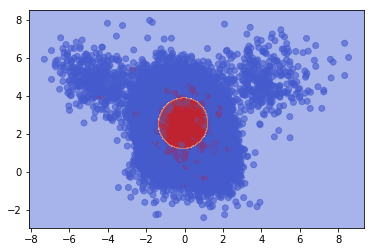

The score of SVM with gamma=0.03 and C=0.05 is:
0.8222071868891896


In [31]:
plot_SVM(외국인스탯캐스터_filter,gamma=0.03, C=0.05)